In [5]:
#linear reg using closed form normal equation
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.rand(100,1)
X_b=np.c_[np.ones((100,1)),X]
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))
theta_best

array([[4.45395212],
       [3.03541446]])

In [7]:
#making predictions using optimised theta vector found using normal equation
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 4.45395212],
       [10.52478103]])

(0.0, 2.0, 0.0, 15.0)

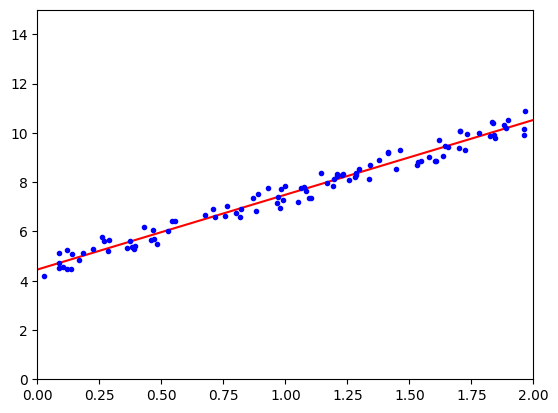

In [17]:
#plotting the predictions
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

In [10]:
#linear reg using in built scikit learn lib-
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.45395212]), array([[3.03541446]]))

In [11]:
#just some under the hood of lin_reg from scikit learn which uses least sq func
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.45395212],
       [3.03541446]])

In [14]:
#Batch GDS implementation
eta=0.1 #learning_rate
n_iterations=1000
m=100
theta=np.random.rand(2,1) #random initialisation
for iteration in range(n_iterations):
    gradients=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradients
theta

array([[4.45395212],
       [3.03541446]])

In [16]:
n_epochs=50
t0,t1=5,50
def learning_schedule(t):
    return t0/(t+t1)
theta=np.random.rand(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
theta
    

array([[4.4570398 ],
       [3.02679609]])

In [19]:
# ridge regression to regularize the overfitting model
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[8.96536116]])

In [22]:
#using sgd
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

C:\Users\khush\ml\env\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([9.10764987])